### Import Packages and Data

In [2]:
! pip install scikit-learn
! pip install statsmodels


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [3]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS

In [4]:
# Import expansive programming data produced by 'work_and_composer_history.ipynb'
nyphil_programming_df = pd.read_csv(
        'nyphil_expansive_programming_data_by_season.csv')

# Filter out seasons beginning before 1950. This is done to reduce skewing due
# to the fact that all repertoire is new for a newly established orchestra.
nyphil_after_1849 = nyphil_programming_df[nyphil_programming_df['season_year'] > 1849]

nyphil_after_1849.describe()

,total_composers,new_composers,repeat_composers,new_composers_p,repeat_composers_p,total_works,new_works,repeat_works,new_works_p,repeat_works_p,new_works_and_composers_p,season_year,decade
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
mean,97.149425,17.534483,79.614943,0.170697,0.829303,227.873563,74.143678,153.729885,0.341748,0.658252,0.227541,1936.500000,1932.068966
std,58.571142,17.581403,45.228974,0.082421,0.082421,140.909581,55.072071,95.974657,0.106768,0.106768,0.092360,50.373604,50.411897
min,13.000000,0.000000,9.000000,0.000000,0.500000,22.000000,5.000000,10.000000,0.121827,0.346154,0.000000,1850.000000,1850.000000
25%,33.000000,5.000000,28.000000,0.111111,0.783000,72.750000,28.250000,44.000000,0.268756,0.598760,0.173913,1893.250000,1890.000000
50%,105.500000,12.500000,88.500000,0.161105,0.838895,243.500000,67.500000,171.000000,0.327938,0.672062,0.222762,1936.500000,1930.000000
75%,139.000000,24.750000,114.500000,0.217000,0.888889,344.000000,103.000000,229.000000,0.401240,0.731244,0.270375,1979.750000,1977.500000
max,313.000000,138.000000,188.000000,0.500000,1.000000,713.000000,323.000000,390.000000,0.653846,0.878173,0.750000,2023.000000,2020.000000


### New Composer Vizualizations

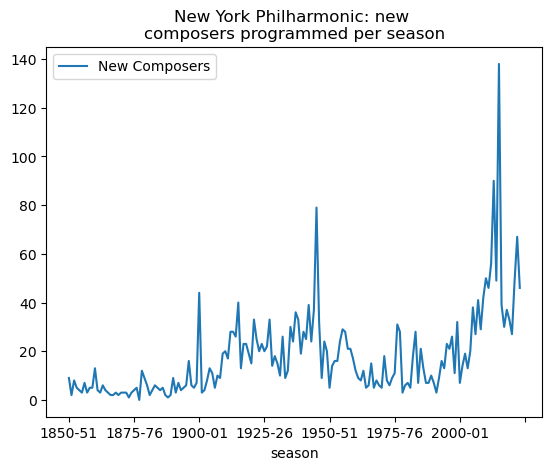

In [5]:
nyphil_after_1849.plot(
    x="season", 
    y="new_composers", 
    title="New York Philharmonic: new \ncomposers programmed per season",
    kind='line')

plt.legend(["New Composers"], loc='best')

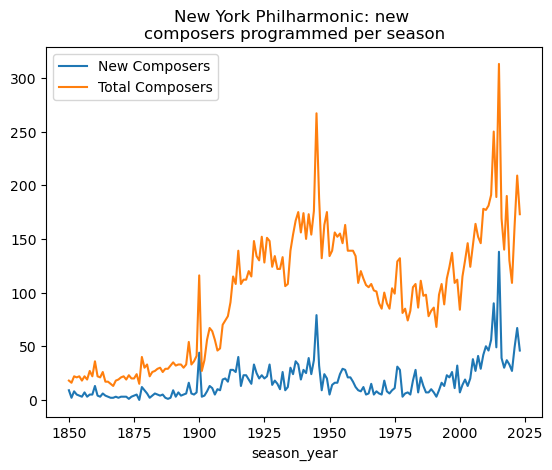

In [6]:
nyphil_after_1849.plot(
    x="season_year", 
    y=["new_composers", "total_composers"], 
    title="New York Philharmonic: new \ncomposers programmed per season",
    kind='line')

plt.legend(["New Composers", "Total Composers"], loc='best')

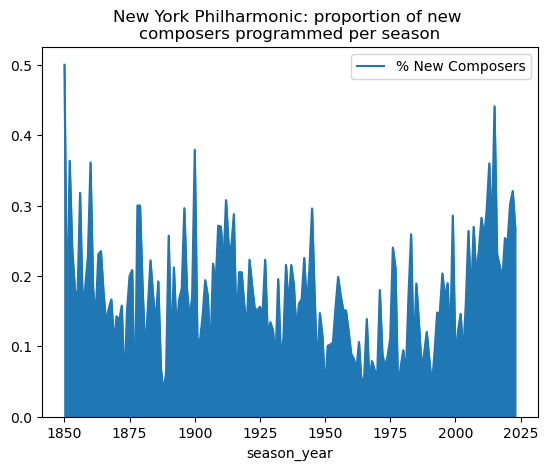

In [7]:
nyphil_after_1849.plot(
    x="season_year", 
    y="new_composers_p",
    title="New York Philharmonic: proportion of new \ncomposers programmed per season", kind='area')

plt.legend(["% New Composers"], loc='best')

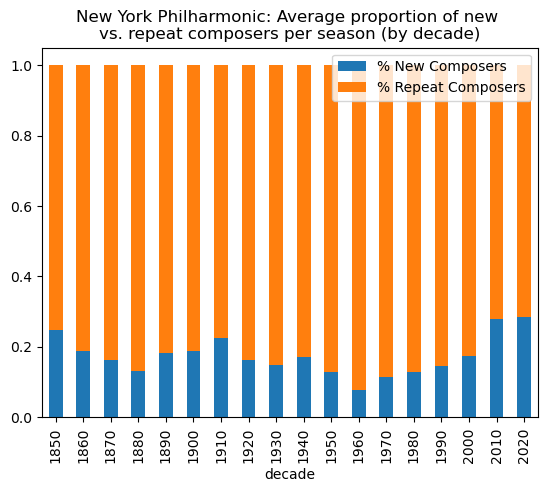

In [8]:
# Plot the percentage of new and repeat composers in a season averaged by decade.
# Percentages are stacked to show the proportion of each.
p_new_composers_by_decade = nyphil_after_1849[['decade', 'new_composers_p', 'repeat_composers_p']].groupby('decade', observed=False).mean()

p_new_composers_by_decade.plot(
    y=["new_composers_p", "repeat_composers_p"], 
    title="New York Philharmonic: Average proportion of new \nvs. repeat composers per season (by decade)", 
    kind='bar',
    stacked=True,)

plt.legend(["% New Composers", "% Repeat Composers"], loc='best')

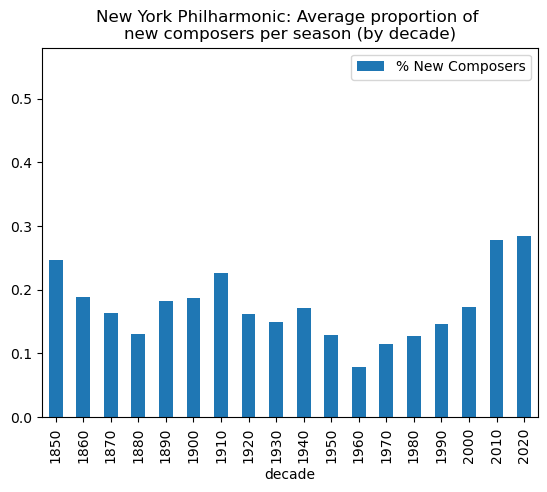

In [9]:
# Plotting only the percentage of new composers to have a closer look at the trends
p_new_composers_by_decade.plot( 
    y=["new_composers_p", ], 
    title="New York Philharmonic: Average proportion of \nnew composers per season (by decade)", 
    kind='bar',
    ylim=(0, .58))

plt.legend(["% New Composers"], loc='best')

### New Works Vizualizations

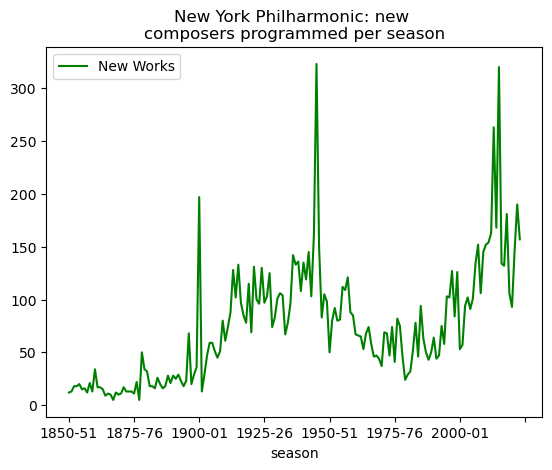

In [10]:
nyphil_after_1849.plot(
    x="season", 
    y="new_works", 
    title="New York Philharmonic: new \ncomposers programmed per season",
    kind='line',
    color='green')

plt.legend(["New Works"], loc='best')

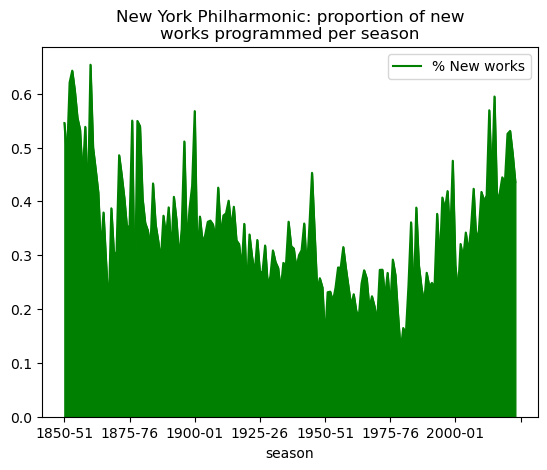

In [11]:
nyphil_after_1849.plot(
    x="season", 
    y="new_works_p", 
    title="New York Philharmonic: proportion of new\nworks programmed per season", 
    kind='area', 
    color='green')

plt.legend(["% New works"], loc='best')

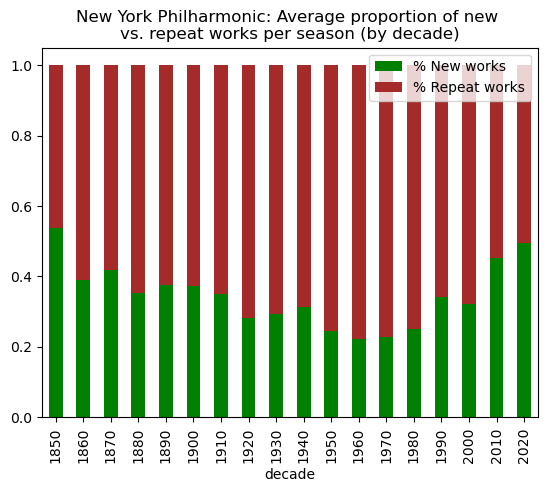

In [12]:
# Plot the percentage of new and repeat works in a season averaged by decade.
# Percentages are stacked to show the proportion of each.
p_new_works_by_decade = nyphil_after_1849[['decade', 'new_works_p', 'repeat_works_p']].groupby('decade', observed=False).mean()

p_new_works_by_decade.plot(
    y=["new_works_p", "repeat_works_p"], 
    title="New York Philharmonic: Average proportion of new \nvs. repeat works per season (by decade)", 
    kind='bar',
    stacked=True,
    color = ['green', 'brown'])

plt.legend(["% New works", "% Repeat works"], loc='best')

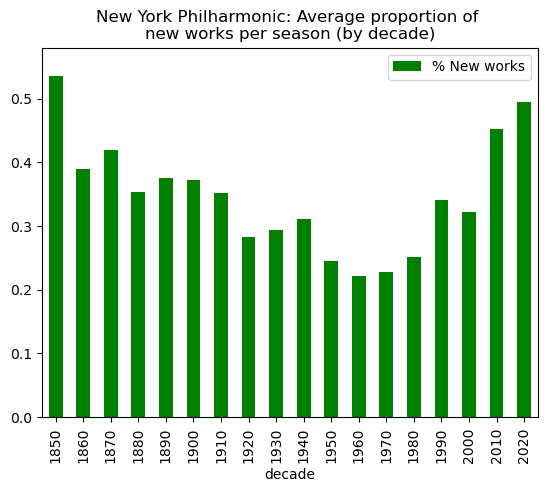

In [13]:
# Plotting only the percentage of new works to have a closer look at the trends
p_new_works_by_decade.plot( 
    y=["new_works_p", ], 
    title="New York Philharmonic: Average proportion of \nnew works per season (by decade)", 
    kind='bar',
    color='green',
    ylim=(0, .58))

plt.legend(["% New works"], loc='best')

### New Works & Composers Visualizations

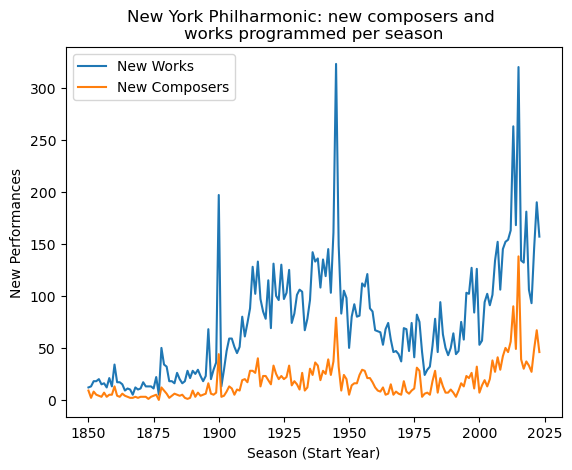

In [14]:
nyphil_after_1849.plot(
    x="season_year", 
    y=["new_works", "new_composers"],
    title="New York Philharmonic: new composers and \nworks programmed per season",
    kind='line',
    xlabel="Season (Start Year)",
    ylabel= 'New Performances')

plt.legend(["New Works", "New Composers" ], loc='best')

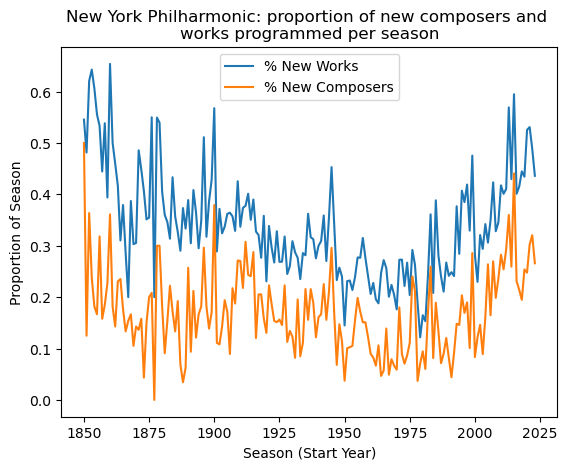

In [15]:
nyphil_after_1849.plot(
    x="season_year", 
    y=["new_works_p", "new_composers_p"],
    title="New York Philharmonic: proportion of new composers and \nworks programmed per season",
    kind='line',
    xlabel="Season (Start Year)",
    ylabel= 'Proportion of Season')

plt.legend(["% New Works", "% New Composers" ], loc='best')

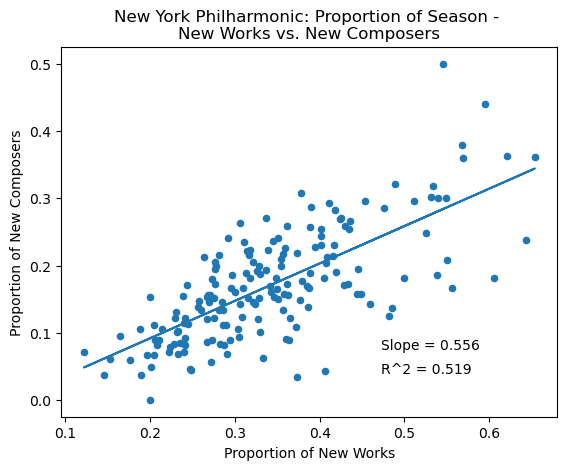

In [16]:
# Scatter plot of new works percentage vs. new composers percentage.
# Show positive association between performing new works and introducing new composers
nyphil_after_1849.plot(
    x="new_works_p", 
    y="new_composers_p",
    title="New York Philharmonic: Proportion of Season - \nNew Works vs. New Composers",
    kind='scatter',
    xlabel="Proportion of New Works",
    ylabel= 'Proportion of New Composers'
    )

# Fit a trendline on plot with linear regression using scikit-learn
x = nyphil_after_1849[['new_works_p']]
y = nyphil_after_1849[['new_composers_p']]

regr = LinearRegression()

regr.fit(x,y)

r2_score = round(regr.score(x,y), 3)
slope = round(regr.coef_[0][0], 3)

plt.figtext(.625, .25, f'Slope = {slope}')
plt.figtext(.625, .2, f'R^2 = {r2_score}')

plt.plot(x, regr.predict(x))

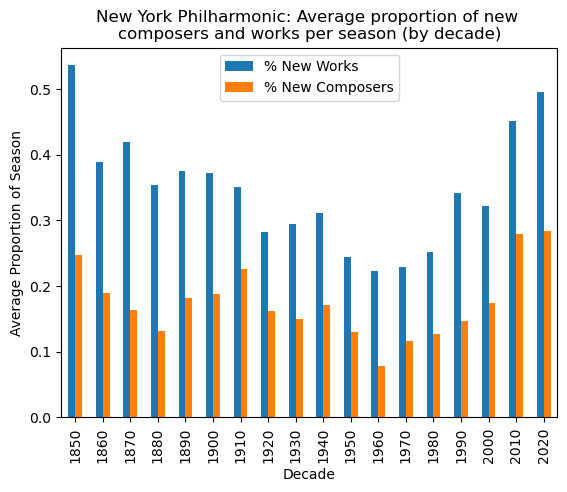

In [17]:
nyphil_programming_by_decade = nyphil_after_1849[['decade', 'new_works_p', 'new_composers_p', 'new_works_and_composers_p']].groupby('decade', observed=False).mean()

nyphil_programming_by_decade.plot(
    y=["new_works_p","new_composers_p" ], 
    title="New York Philharmonic: Average proportion of new \ncomposers and works per season (by decade)", 
    kind='bar',
    xlabel="Decade",
    ylabel= 'Average Proportion of Season')

plt.legend(["% New Works", "% New Composers"], loc='best')

<Axes: title={'center': 'New York Philharmonic: percent of new works \ncomposed by previously un-performed composers.'}, xlabel='Season (Start Year)', ylabel='Proportion of New Works Composed by New Composers'>

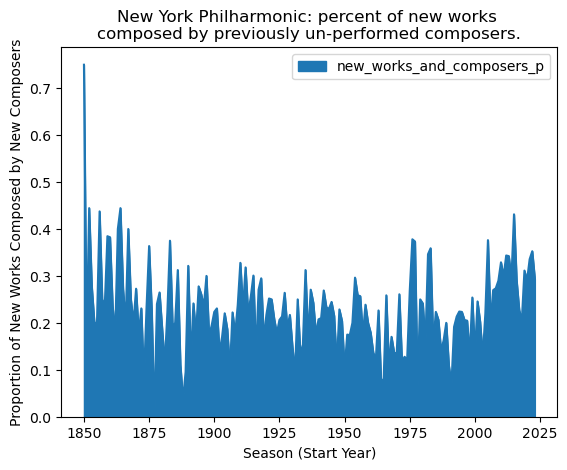

In [18]:
nyphil_after_1849.plot(
    x="season_year", 
    y=["new_works_and_composers_p"],
    title="New York Philharmonic: percent of new works \ncomposed by previously un-performed composers.",
    kind='area',
    xlabel="Season (Start Year)",
    ylabel= 'Proportion of New Works Composed by New Composers')

<Axes: title={'center': 'New York Philharmonic: percent of new works \ncomposed by previously un-performed composers (by decade).'}, xlabel='Decade', ylabel='Average Proportion of New Works by New Composers per season'>

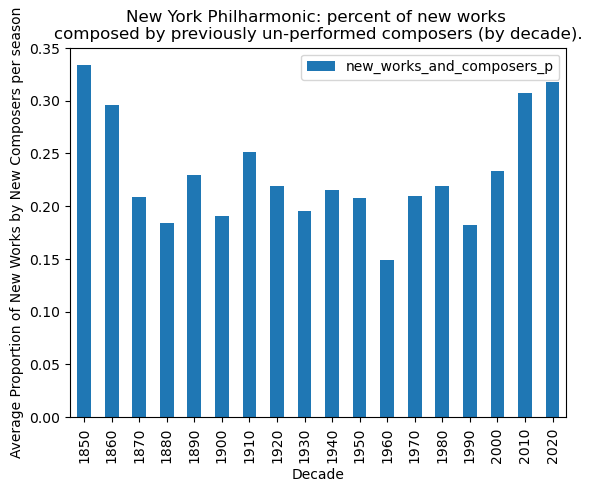

In [19]:
nyphil_programming_by_decade.plot(
    y=["new_works_and_composers_p"], 
    title="New York Philharmonic: percent of new works \ncomposed by previously un-performed composers (by decade).", 
    kind='bar',
    xlabel="Decade",
    ylabel= 'Average Proportion of New Works by New Composers per season')

Text(0.5, 1.0, 'Rolling OLS Regression (25 year window):\nNew Works Percentage vs. Time')

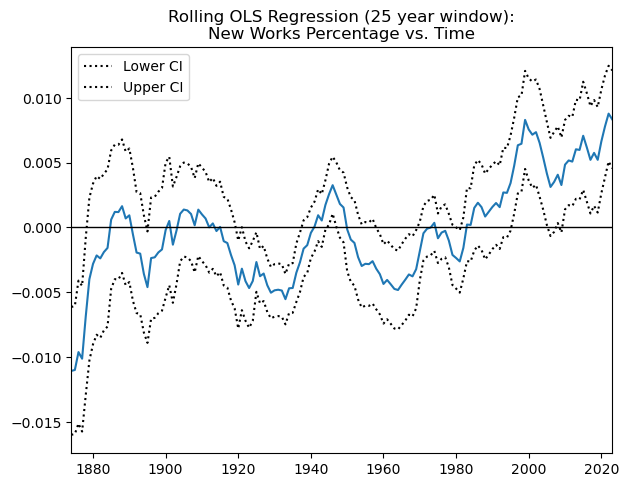

In [ ]:
# Conduct an Ordinary Least Squares Rolling Regression using Statsmodels
# Tutorial: https://www.statsmodels.org/dev/examples/notebooks/generated/rolling_ls.html
rolling_df = nyphil_after_1849.set_index('season_year')

# New Works Proportion Rolling OLS  Regression
endog1 = rolling_df['new_works_p']
exog1 = sm.add_constant(rolling_df.index)
rols1 = RollingOLS(endog1,exog1, window=25)
rres1 = rols1.fit()

# Plot New Works ROLS
params1 = rres1.params.copy()
fig = rres1.plot_recursive_coefficient(variables=['x1'])
plt.axhline(y=0, color='k', linewidth=1)
plt.title("Rolling OLS Regression (25 year window):\nNew Works Percentage vs. Time")

Text(0.5, 1.0, 'Rolling OLS Regression (25 year window):\nNew Composers Percentage vs. Time')

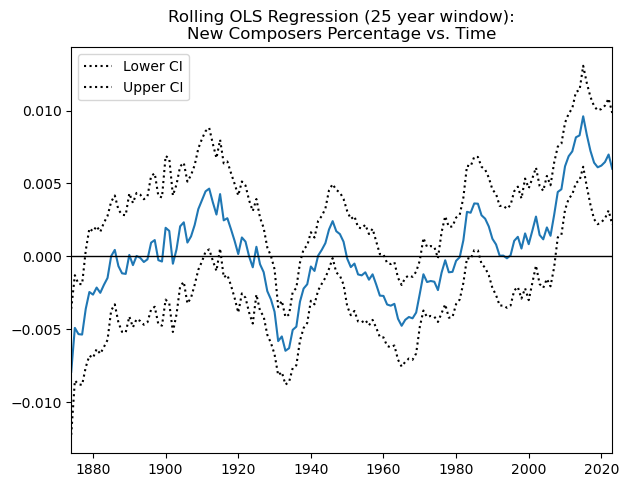

In [ ]:
# New Composers Proportion Rolling OLS Regression
endog2 = rolling_df['new_composers_p']
exog2 = sm.add_constant(rolling_df.index)
rols2 = RollingOLS(endog2,exog2, window=25)
rres2 = rols2.fit()
params2 = rres2.params.copy()

# Plot New Composers ROLS
fig = rres2.plot_recursive_coefficient(variables=['x1'])
plt.axhline(y=0, color='k', linewidth=1)
plt.title("Rolling OLS Regression (25 year window):\nNew Composers Percentage vs. Time")